## Capstone Unit 1: Improving Kobe Bryant's Three Point Shooting

Kobe Bryant was one of, if not, the best player in the NBA during his time. However his career began to decline in 2010. I will analyze his 3P% and see if we can improve it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats
from matplotlib.patches import Circle, Rectangle, Arc

%matplotlib inline
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/Kobe.csv')

threes = df[(df['shot_type'] == '3PT Field Goal')]
threes = threes.dropna()
threes = threes[threes['shot_zone_area'] != 'Back Court(BC)']
threes['year'] = threes['season'].str.split('-').str[0]
threes['year'] = threes['year'].astype(int)

df2011 = threes[(threes['year'] == 2011)]
df2011right = df2011[(df2011['shot_zone_area'] == 'Right Side(R)')]
df2011other = df2011[(df2011['shot_zone_area'] != 'Right Side(R)')]

threes = threes[(threes['year'] < 2011)]
left_side = threes[(threes['shot_zone_area'] == 'Left Side(L)')]
left_center = threes[(threes['shot_zone_area'] == 'Left Side Center(LC)')]
center = threes[(threes['shot_zone_area'] == 'Center(C)')]
right_side = threes[(threes['shot_zone_area'] == 'Right Side(R)')]
right_center = threes[(threes['shot_zone_area'] == 'Right Side Center(RC)')]
nba_seasons = threes.groupby('year').mean()
shooting_areas = threes.groupby('shot_zone_area')
order = ['Left Side(L)', 'Left Side Center(LC)', 'Center(C)', 'Right Side Center(RC)', 'Right Side(R)']
print('3P%')
print(threes['shot_made_flag'].mean())

3P%
0.3449443638122883


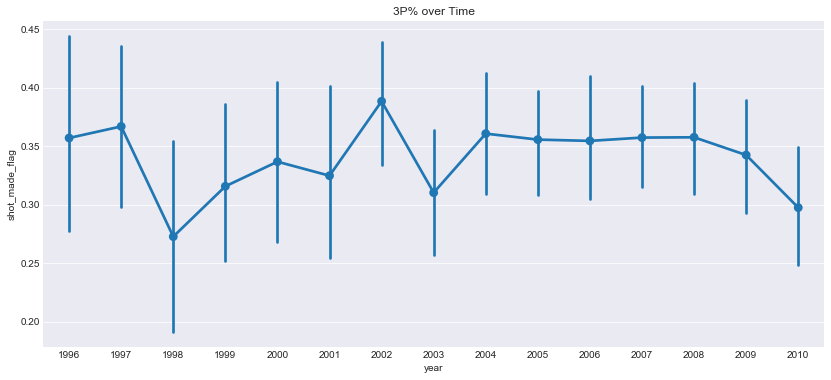

In [2]:
plt.figure(figsize = (14,6))
sns.set_style("darkgrid")
ax = sns.pointplot(x='year', y="shot_made_flag", data=threes).set_title('3P% over Time')
plt.show()

As you can see from the graph 2010 had a steep decline as Kobe was shooting over 35% from beyond the arc but in 2010 he went down to less than 30%

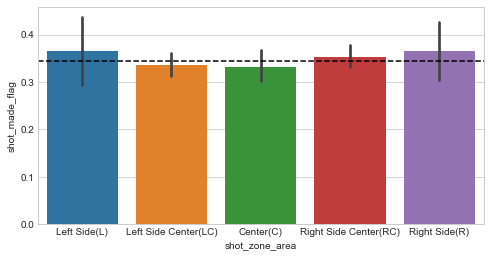

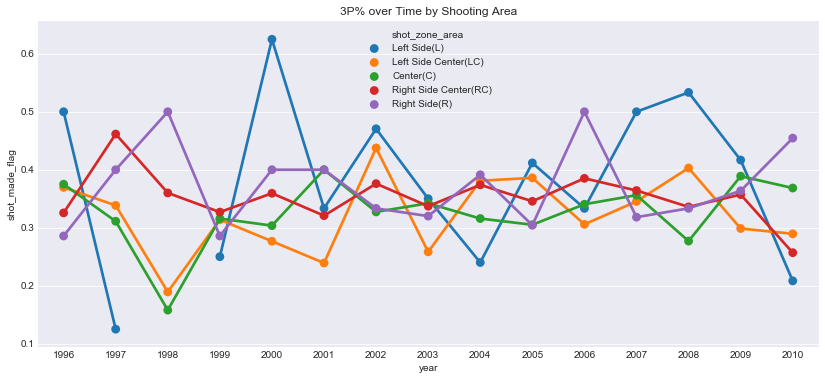

In [3]:
plt.figure(figsize = (8,4))
sns.set_style("whitegrid")
ax = sns.barplot(x="shot_zone_area", y="shot_made_flag", data=threes, order = order)
ax.axhline(y = threes.shot_made_flag.mean(), color = 'black', linestyle = 'dashed')
plt.xlabel='3 PT Percentage'
plt.ylabel='Shooting Area'
plt.title='Career 3 PT Percentage by Area'
plt.show()

plt.figure(figsize = (14,6))
sns.set_style("darkgrid")
ax = sns.pointplot(x='year', y="shot_made_flag", hue = 'shot_zone_area', data=threes, ci =None,
                   hue_order = order).set_title('3P% over Time by Shooting Area')
plt.show()

In these two images above we see the his 3P% broken down my area. The first one is his career average 3P% and the second one his average 3P% separated by year. As we can see from the data his left and right side (corner 3s) are higher throughout his career than the center. A concerning point I would note as a GM is that Kobe's 3P% from all the areas except the right side have declined.  The left side in particular has gone down a staggering 20%.

In [4]:
## Credit to the following code goes to Savvas Tjortjoglou 
## http://savvastjortjoglou.com/nba-shot-sharts.html

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

def shot_chart(data, title) :
    joint_shot_chart = sns.jointplot(data.loc_x, data.loc_y, stat_func=None,
                                 kind='hex', space=0, alpha=0.5)
    joint_shot_chart.fig.set_size_inches(11,10)
    ax = joint_shot_chart.ax_joint
    draw_court(ax)
    ax.set_xlim(-250,250)
    ax.set_ylim(422.5, -47.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')

    ax.set_title(title, y=1.2, fontsize=18)

    plt.show()

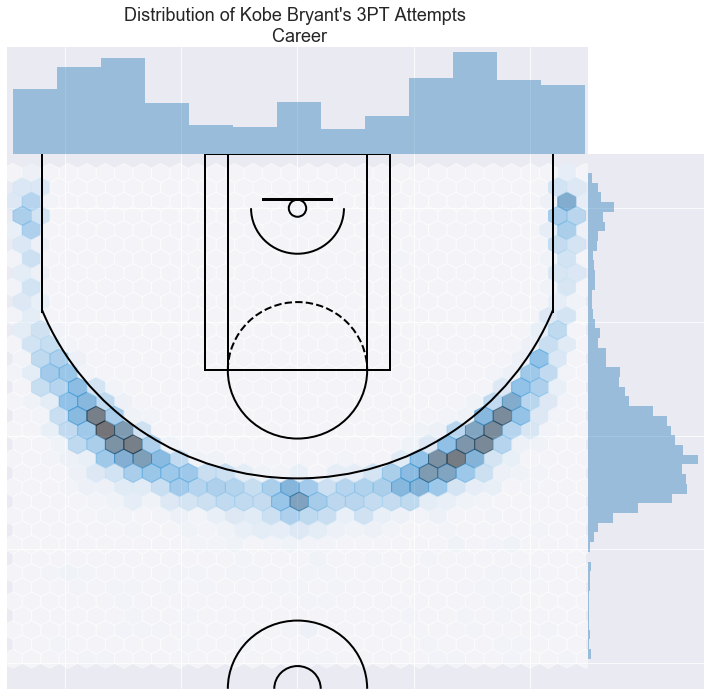

In [5]:
shot_chart(threes, "Distribution of Kobe Bryant's 3PT Attempts \n Career")

Above shows the distribution of his 3P shot attempts.  As we can see from the above image Kobe takes a lot fewer shots from the corner than the left center, right center, and center.

## Experiment

As the GM running the experiment I would like Kobe Bryant to try to improve Kobe Bryant's 3P% on the left corner because I see a dip in his 3P% from the left corner. I would recommend him practicing solely 3pt shots on the left side with a shooting training program and see if there's a difference.

This experiment will be separated in two groups

Test: 3P% difference from the left side after training <p>
Control: 3P% from the other areas of the court that received no training

Test Sample: All the 3P attempts from the right corner from the 2011 season.

Control Sample: All other 3P attempts from the 2011 season.

Null Hypothesis: No differences between Test Sample and 3rd sample.

Evaluation: 
To evaluate the experiment I am going to look at the differences in 3P% in areas and run a t test to see if the there is significant difference after training 3P shots.

In [6]:
sp.stats.ttest_ind(df2011right['shot_made_flag'], 
                      df2011other['shot_made_flag'])

Ttest_indResult(statistic=0.17443097879303837, pvalue=0.86164442393421226)

The analysis done is from actual 2011 records. Obviously I could not go back in time and tell Kobe to train the left side only so the data shows **we cannot disprove the null hypothesis**